ρ:  1.0

Average waiting time is: 0.10422204984671135
With the Confidence Interval:  0.09665704130841693 0.11178705838500577
Confidence Interval's Size:  0.015130017076588842

Average job's size is: 1.000075981507042
With the Confidence Interval:  0.9878044318922637 1.0123475311218202
Confidence Interval's Size:  0.024543099229556442


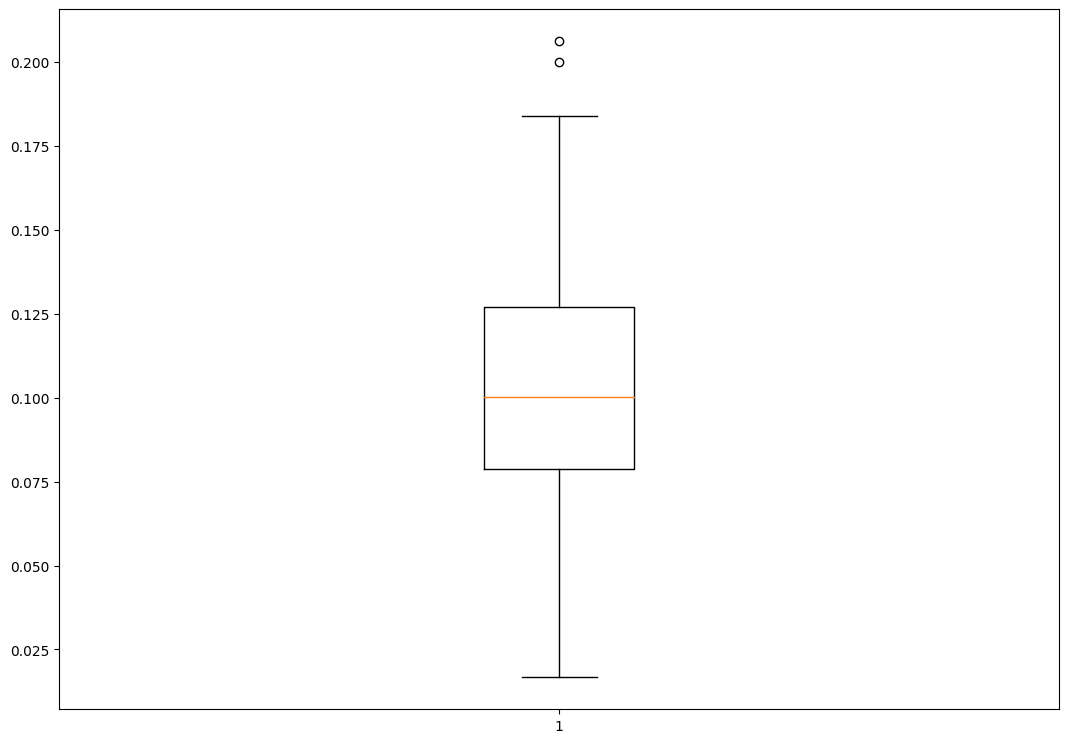

In [36]:
import simpy
import numpy as np

# Confidence Interval calculation
from scipy.stats import t
def confidence_interval(simulation_results, title="", confidence=0.95, output_results=True):
    mean = np.mean(simulation_results)
    std = np.std(simulation_results)
    degree = len(simulation_results) - 1 
    t_crit = np.abs(t.ppf((1-confidence)/2, degree))    # Find the inverse cumulative distribution.
    ci = std*t_crit/np.sqrt(len(simulation_results))
    if output_results:
        print(str(title) + str(mean))
        conf_int_low = mean-ci
        conf_int_high = mean+ci
        print("With the Confidence Interval: ", conf_int_low, conf_int_high)
        print("Confidence Interval's Size: ", conf_int_high-conf_int_low)
        return
    else: return mean, ci

jobs_to_process = 1000  # Number of Jobs
runtime_limit = 500.0   # Runtime Limit
seed = 42               # Seed for Simulation

# lambda
arrival_rate = 2.0  # Mean of arrival process
# miu
job_rate = 1.0   # Mean time in bank
# n
servers_amount = 2
#rho
system_load = arrival_rate/(servers_amount * job_rate)

priority_queue = False
job_distribution = "Exponential"    # "Exponential", "Exponential_Fat", "Degenerate"


def Customer(env, name, resources):
    arrive = env.now

    # Getting Status of Queues
    queue_size = []
    for queue in resources:
        queue_size.append(len(queue.put_queue) + len(queue.users))

    # Choosing a Queue for an arrived Client
    choice = np.argmin(queue_size)
    
    # Deciding on job size
    if job_distribution=="Exponential":
        job_duration = np.random.exponential(job_rate)
    if job_distribution=="Exponential_Fat":
        if np.random.uniform() < 0.75:
            job_duration = np.random.exponential(job_rate)
        else:
            job_duration = np.random.exponential(5*job_rate)
    if job_distribution=="Degenerate":
            job_duration = job_rate

    job_durations.append(job_duration)
    # Handling depends on the chosen queue
    if priority_queue:
        # Sending job to its position
        with resources[choice].request(priority=job_duration) as req:
            # Wait for the Server
            yield req
            waiting_times.append(env.now - arrive)
            # Starting the Job
            yield env.timeout(job_duration)
    else:
        with resources[choice].request() as req:
            # Wait for the Server
            yield req
            waiting_times.append(env.now - arrive)
            # Starting the Job
            yield env.timeout(job_duration)
  
def Source(env, jobs_to_process, arrival_rate, resources):
    for i in range(jobs_to_process):
        c = Customer(env, 'Customer ' + str(i), resources)
        env.process(c)
        t = np.random.exponential(arrival_rate)
        yield env.timeout(t)


# Starting Simulation
trials = 100
np.random.seed(seed)
waiting_times_trials = []
job_durations_trials = []
for i in range(trials):
    waiting_times = []      # Waiting times of performed jobs
    job_durations = []      # Average job size
    # Setup trial
    env = simpy.Environment()
    # Creating Queues
    resources = []
    if priority_queue:
        for s in range (servers_amount):
            resources.append(simpy.PriorityResource(env))
    else:
        for s in range (servers_amount):
            resources.append(simpy.Resource(env))
    env.process(Source(env, jobs_to_process, arrival_rate, resources))
    env.run(until=runtime_limit)

    waiting_times_trials.append(np.mean(waiting_times))     # Saving Results
    job_durations_trials.append(np.mean(job_durations))     # Saving Results

print("ρ: ", system_load)
print()
confidence_interval(waiting_times_trials, "Average waiting time is: ")
print()
confidence_interval(job_durations_trials, "Average job's size is: ")    # Just to verify that right distribution is used



# Visualization
import matplotlib.pyplot as plt

data = [waiting_times_trials]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)

plt.show()

What to compare?


MM1 vs MM2 vs MM4, average waiting time

MM2, rho = [0.0, 2.0], compare stat signific

MM1 priority vs no priority, average waiting time

MD1 vs MD2 vs MD4, average waiting time

Hyperexponential distribution

Amount of Queues:  1
Load ρ:  0.99
Average waiting time is: 6.896582015142923
With the Confidence Interval:  6.030869736571813 7.7622942937140325
Confidence Interval's Size:  1.731424557142219

Amount of Queues:  2
Load ρ:  0.99
Average waiting time is: 0.05171074512587279
With the Confidence Interval:  0.04435564138137783 0.05906584887036774
Confidence Interval's Size:  0.014710207488989907

Amount of Queues:  4
Load ρ:  0.99
Average waiting time is: 6.1526003844697635e-06
With the Confidence Interval:  -5.99429975537733e-06 1.8299500524316857e-05
Confidence Interval's Size:  2.4293800279694187e-05



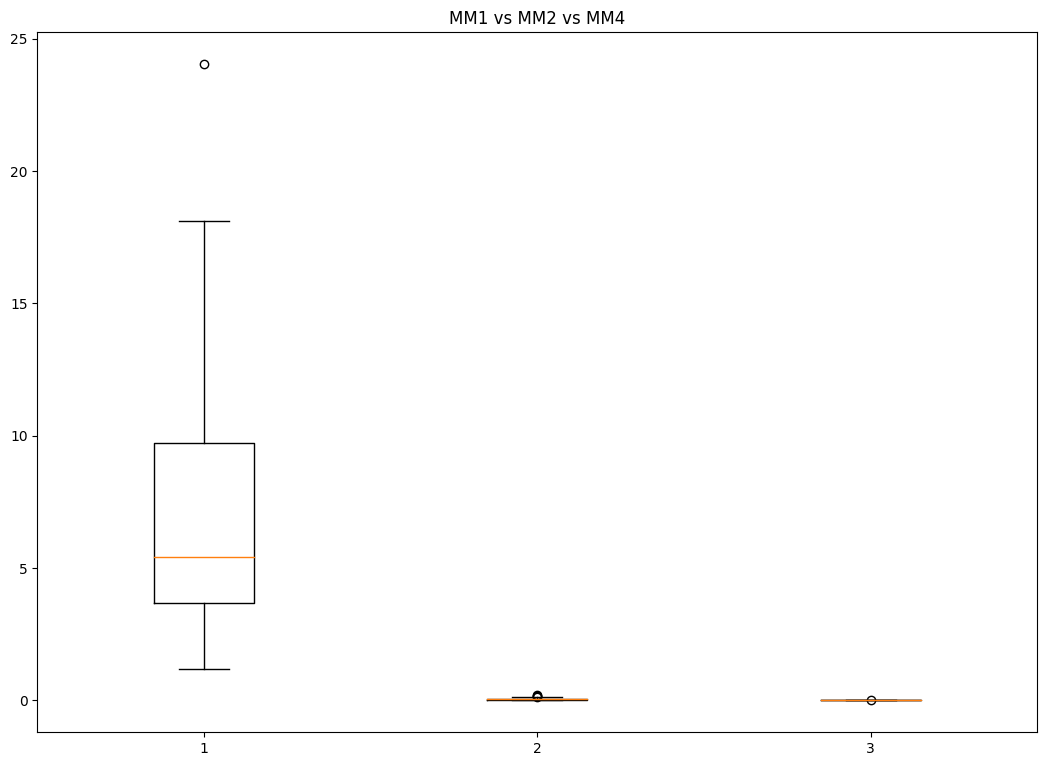

In [50]:
import simpy
import numpy as np

jobs_to_process = 100   # Number of Jobs
runtime_limit = 500.0   # Runtime Limit
seed = 42               # Seed for Simulation

priority_queue = False
job_distribution = "Exponential"    # "Exponential", "Exponential_Fat", "Degenerate"


# Starting Simulation
trials = 100
np.random.seed(seed)

visualisation_list = []
for n in [1, 2, 4]:
    arrival_rate = 0.99  # lambda
    base_job_rate = 1.0 # miu
    # Some changes, so that rho is always close to 1
    servers_amount = n
    job_rate = base_job_rate / n
    system_load = arrival_rate/(servers_amount * job_rate)

    waiting_times_trials = []
    job_durations_trials = []
    for i in range(trials):
        waiting_times = []      # Waiting times of performed jobs
        job_durations = []      # Average job size
        # Setup trial
        env = simpy.Environment()
        # Creating Queues
        resources = []
        if priority_queue:
            for s in range (servers_amount):
                resources.append(simpy.PriorityResource(env))
        else:
            for s in range (servers_amount):
                resources.append(simpy.Resource(env))
        env.process(Source(env, jobs_to_process, arrival_rate, resources))
        env.run(until=runtime_limit)

        waiting_times_trials.append(np.mean(waiting_times))     # Saving Results
        job_durations_trials.append(np.mean(job_durations))     # Saving Results

    print("Amount of Queues: ", n)
    print("Load ρ: ", system_load)
    confidence_interval(waiting_times_trials, "Average waiting time is: ")
    #confidence_interval(job_durations_trials, "Average job's size is: ")    # Just to verify that right distribution is used
    print()
    visualisation_list.append(waiting_times_trials)


# Visualization
import matplotlib.pyplot as plt

data = visualisation_list
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.title("MM1 vs MM2 vs MM4")
plt.show()

Load ρ:  0.1
Average waiting time is: 7.542596688025218
With the Confidence Interval:  7.220919880465328 7.864273495585108
Confidence Interval's Size:  0.6433536151197803

Load ρ:  0.2
Average waiting time is: 3.3116097253187133
With the Confidence Interval:  2.9750728442107075 3.648146606426719
Confidence Interval's Size:  0.6730737622160117

Load ρ:  0.30000000000000004
Average waiting time is: 0.7962325170668167
With the Confidence Interval:  0.6946242107666983 0.8978408233669352
Confidence Interval's Size:  0.20321661260023682

Load ρ:  0.4
Average waiting time is: 0.32913413121593527
With the Confidence Interval:  0.2807198214602764 0.3775484409715941
Confidence Interval's Size:  0.09682861951131772

Load ρ:  0.5
Average waiting time is: 0.19745522129238016
With the Confidence Interval:  0.17510135377454697 0.21980908881021335
Confidence Interval's Size:  0.044707735035666385

Load ρ:  0.6
Average waiting time is: 0.13044128838739957
With the Confidence Interval:  0.11524328088828

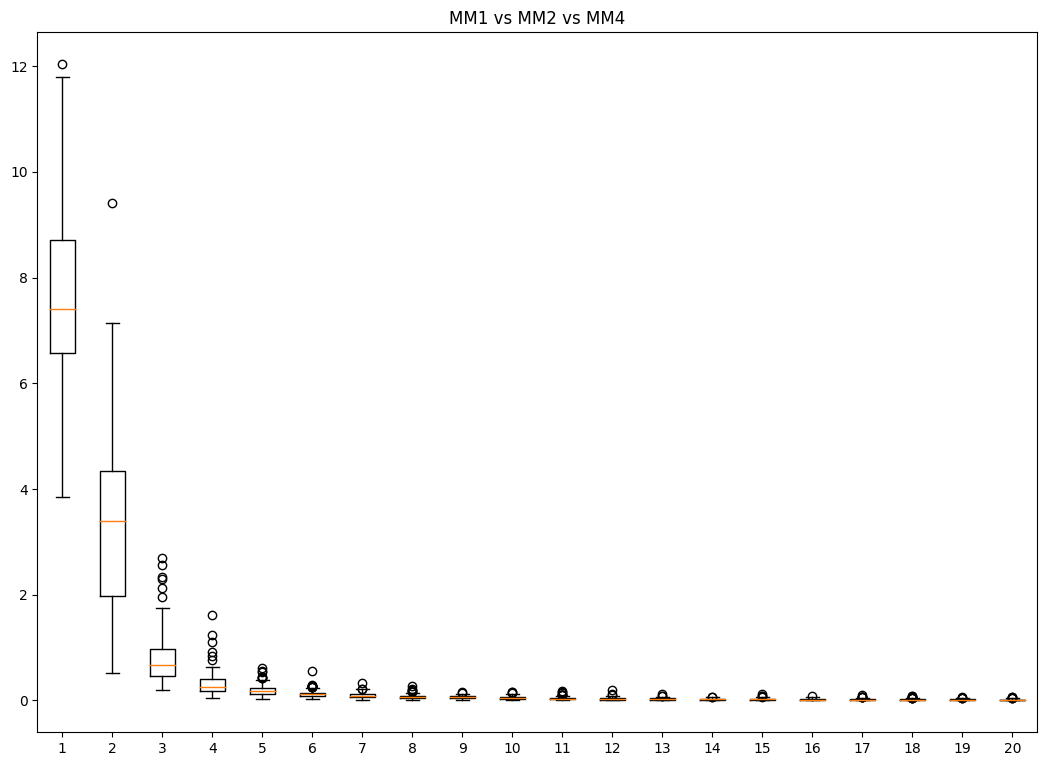

In [56]:
import simpy
import numpy as np

jobs_to_process = 100   # Number of Jobs
runtime_limit = 500.0   # Runtime Limit
seed = 42               # Seed for Simulation

priority_queue = False
job_distribution = "Exponential"    # "Exponential", "Exponential_Fat", "Degenerate"


# Starting Simulation
trials = 100
#np.random.seed(seed)

visualisation_list = []
for arrival_rate in np.arange (0.1, 2.1, 0.1):   # varying lambda
    base_job_rate = 1.0 # miu
    servers_amount = 2
    job_rate = base_job_rate / servers_amount
    system_load = arrival_rate/(servers_amount * job_rate)

    waiting_times_trials = []
    job_durations_trials = []
    for i in range(trials):
        waiting_times = []      # Waiting times of performed jobs
        job_durations = []      # Average job size
        # Setup trial
        env = simpy.Environment()
        # Creating Queues
        resources = []
        if priority_queue:
            for s in range (servers_amount):
                resources.append(simpy.PriorityResource(env))
        else:
            for s in range (servers_amount):
                resources.append(simpy.Resource(env))
        env.process(Source(env, jobs_to_process, arrival_rate, resources))
        env.run(until=runtime_limit)

        waiting_times_trials.append(np.mean(waiting_times))     # Saving Results
        job_durations_trials.append(np.mean(job_durations))     # Saving Results

    print("Load ρ: ", system_load)
    confidence_interval(waiting_times_trials, "Average waiting time is: ")
    #confidence_interval(job_durations_trials, "Average job's size is: ")    # Just to verify that right distribution is used
    print()
    visualisation_list.append(waiting_times_trials)


# Visualization
import matplotlib.pyplot as plt

data = visualisation_list
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.title("Rho is varying from 0.1 to 2.0")
plt.show()